## Codio Activity 6.7: Conducting K-Means in Scikit-Learn

**Expected Time: 60 Minutes**

**Total Points: 24 Points**

This activity focuses on using `sklearn` to perform `KMeans` clustering.  You will compare initialization methods and determine the "right" number of clusters using an elbow plot.  The data are again produced using `sklearn`.    

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Creating the Data

Data are created with a known number of cluster centers to make the evaluation of the clustering more straightforward.  A dataset with three features and 4 clusters are created and plotted below.  Your task is to uncover these clusters using `KMeans`.  

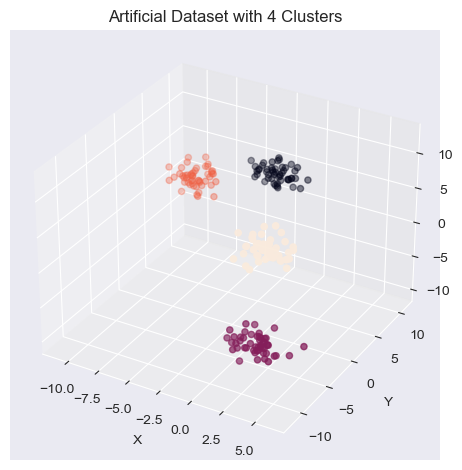

In [3]:
X, y = make_blobs(n_samples=200, n_features=3, centers = 4, random_state=42)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();

[Back to top](#Index:) 

## Problem 1

### Instantiate `KMeans`

**4 Points**

To begin, you are to create an instance of the `KMeans` clusterer.  Slightly different than the lectures, we directly import the `KMeans` object.  Note that the default number of cluster centers is 8, controlled by the `n_clusters` argument.  Leave all the arguments at their default value **except for to set `random_state = 42`** for your instance and assign it to the variable `kmeans` below.

In [4]:
### GRADED

kmeans = '' #Don't Forget to set the random_state!!!

### BEGIN SOLUTION
kmeans = KMeans(random_state=42)
### END SOLUTION

# Answer check
print(kmeans)
print(type(kmeans))

KMeans(random_state=42)
<class 'sklearn.cluster._kmeans.KMeans'>


In [5]:
### BEGIN HIDDEN TESTS
kmeans_ = KMeans(random_state=42)
n_clusters = kmeans.n_clusters
n_clusters_ = kmeans_.n_clusters
state = kmeans.random_state
state_ = kmeans_.random_state
#
#
#
assert type(kmeans) == type(kmeans_), 'Make sure to create a new instance of KMeans'
assert n_clusters == n_clusters_, 'Leave the n_clusters to the default value'
assert state == state_, 'Make sure your random state is set to 42'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### Using `KMeans`

**4 Points**

To conduct the `KMeans` clustering algorithm on the data, we use the `.fit()` method on `KMeans`.  This will run the clustering algorithm on our data and make clustering assignments accordingly.  Use your instance from above to fit the data.  

In [6]:
### GRADED

kmeans = '' #Don't Forget to set the random_state!!!

### BEGIN SOLUTION
kmeans = KMeans(random_state=42)
kmeans.fit(X)
### END SOLUTION

# Answer check
print(kmeans)
print(type(kmeans))

KMeans(random_state=42)
<class 'sklearn.cluster._kmeans.KMeans'>


In [7]:
### BEGIN HIDDEN TESTS
kmeans_ = KMeans(random_state=42).fit(X)
centers = kmeans.cluster_centers_
centers_ = kmeans_.cluster_centers_
state = kmeans.random_state
state_ = kmeans_.random_state
#
#
#
np.testing.assert_array_equal(centers, centers_), 'Make sure you leave the number of centers to default'
assert state == state_, 'Make sure your random state is set to 42'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 3

### Checking the `inertia_` attribute.  

**4 Points**

After the cluster object has been fit, we can examine the `.inertia_` attribute that contains the sum of squared distances of samples to their closest cluster center.  Save your fit models `.inertia_` value to the variable `inertia_8_centers` below.

In [8]:
### GRADED

inertia = '' 

### BEGIN SOLUTION
kmeans_ = KMeans(random_state=42).fit(X)
inertia = kmeans.inertia_
### END SOLUTION

# Answer check
print(inertia)
print(type(inertia))

395.20953849825065
<class 'float'>


In [9]:
### BEGIN HIDDEN TESTS
kmeans_ = KMeans(random_state=42).fit(X)
inertia_ = kmeans_.inertia_
state = kmeans.random_state
state_ = kmeans_.random_state
#
#
#
assert inertia_ == inertia, 'Make sure you leave the number of centers to default'
assert state == state_, 'Make sure your random state is set to 42'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 4

### Trying different numbers of clusters

**4 Points**

Our first cluster model used 8 cluster centers.  Below, you are to create a list of inertia scores for models with $1, 2, 3, ..., 10$ cluster centers and append the `.inertia_` value for each to the list `inertias`.  Note that for each instance of `KMeans` you create, set the `random_state = 42`.  

In [10]:
### GRADED

inertias = [] 
#for each value 1 - 10

       #instantiate new KMeans instance
        #Don't Forget to set the random_state!!!
        
        #fit the model
        
        #append inertia score to inertias list

### BEGIN SOLUTION
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
### END SOLUTION

# Answer check
print(inertias)
print(type(inertias))

[26101.99858198211, 8679.882995317126, 1713.285133655538, 554.3359020785313, 511.9017167042792, 473.4404224066797, 441.22708952148605, 395.20953849825065, 381.7757262039269, 348.526623373325]
<class 'list'>


In [11]:
### BEGIN HIDDEN TESTS
inertias_ = []
for i in range(1, 11):
    kmeans_ = KMeans(n_clusters = i, random_state=42).fit(X)
    inertias_.append(kmeans_.inertia_)
#
#
#
assert inertias_ == inertias, 'The inertia lists are not equal'
assert type(inertias) == type(inertias_), 'Make sure your answer is a list'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 5

### Plotting the results

**4 Points**

Now that we have inertia values for `n_clusters` 1, 2, 3, ..., 10, a plot is drawn of the resulting centers and inertia scores.  The $x$-axis should contain the number of cluster centers and the $y$-axis should represent the inertia scores.  Uncomment the plotting code to examine a plot of these inertia values by cluster centers.  According to this plot, which do you feel is the "right" number of cluster centers for the data?  Assign your answer as an integer to `best_n_clusters` below. 

In [12]:
### GRADED

#plt.plot(list(range(1, 11)), inertias, '--o')
#plt.xticks(list(range(1, 11)), list(range(1, 11)))
#plt.title('Inertia Score by n cluster centers');
best_n_clusters = ''

### BEGIN SOLUTION
best_n_clusters = 3
### END SOLUTION

# Answer check
print(best_n_clusters)
print(type(best_n_clusters))

3
<class 'int'>


In [13]:
### BEGIN HIDDEN TESTS
best_n_clusters_ = [3, 4, 5]
#
#
#
assert best_n_clusters in best_n_clusters_, 'Maybe a different number of clusters is ideal?'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 6

### Repeat with `random` initialization of centroids

**4 Points**

Note that by default the `KMeans` clusterer in sklearn uses `kmeans++` to initialize the center of the clusters.  Repeat the above exercise where you loop over values $1, 2, 3, ..., 10$ for the `n_clusters` but now initialize the centers randomly.  Be sure to set `random_state = 42` and save your list of inertias to `random_inertias`.  Does the idea number of clusters change?  Enter your response to the best number of cluster centers when using `random` initialization to `best_n_clusters_random` as an integer below.

In [14]:
### GRADED

random_inertias = [] 
best_n_clusters_random = ''


### BEGIN SOLUTION
random_inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='random', random_state=42).fit(X)
    random_inertias.append(kmeans.inertia_)
best_n_clusters_random = 3
### END SOLUTION

# Answer check
print(random_inertias)
print(type(random_inertias))

[26101.99858198211, 8679.882995317126, 1713.285133655538, 554.3359020785313, 512.3646265768417, 476.1930457715392, 441.0771138491636, 414.2327651478466, 382.97991597719107, 356.061947985832]
<class 'list'>


In [15]:
### BEGIN HIDDEN TESTS
random_inertias_ = []
for i in range(1, 11):
    kmeans_ = KMeans(n_clusters = i, init='random', random_state=42).fit(X)
    random_inertias_.append(kmeans_.inertia_)
best_n_clusters_random = 3
best_random_clusters_ = [2, 3, 4, 5]
#
#
#
assert random_inertias == random_inertias_, 'Your inertia scores do not match up, please check estimator settings.'
assert best_n_clusters_random in best_random_clusters_, 'Maybe a different number of clusters is ideal?'
### END HIDDEN TESTS